**Downloading the dataframe**

In [609]:
!gdown 1-yeX_u5mdqRAYt96CRDJlR_UKJw0zy3p

Downloading...
From: https://drive.google.com/uc?id=1-yeX_u5mdqRAYt96CRDJlR_UKJw0zy3p
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 28.1MB/s]


**Read the dataframe**

In [610]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

df_org = pd.read_csv('netflix.csv')
df_org

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# 1. Defining Problem Statement and Analysing basic metrics

  **a. Problem Statement: Which type of shows/movies to produce and how they can grow the business in different countries**

**b. Analysing basic metrics(Prior to Cleaning) :**

**Shape of the dataframe**

In [611]:
df_org.shape

(8807, 12)

**Datatype of each column**

In [612]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Let's create a copy of the original DataFrame to ensure the original data remains unchanged**

In [613]:
df_copy = df_org.copy()

**Identifying NaN values:**

*   The table below shows the percentage of NaN data


In [614]:
df_copy = df_org.copy()
df_nan = round(df_copy.isna().sum()/len(df_copy)*100, 2)
df_nan = df_nan[df_nan > 0]
df_nan.name = 'NaN Percentage'
df_nan

,NaN Percentage
director,29.91
cast,9.37
country,9.44
date_added,0.11
rating,0.05
duration,0.03


**Identifying the columns which has space-padded string values:**

In [615]:
df_copy = df_org.copy()
for column in df_copy.columns:
  df_space_padded = df_copy[df_copy[column].astype(str).apply(lambda x: x.startswith(' ') or x.endswith(' '))]
  if len(df_space_padded) > 0:
    print(f'\033[1mcolumn {column} has {len(df_space_padded)} space-padded rows\033[0m')
  else:
    print(f'column {column} has {len(df_space_padded)} space-padded rows')

column show_id has 0 space-padded rows
column type has 0 space-padded rows
column title has 0 space-padded rows
column director has 0 space-padded rows
column cast has 0 space-padded rows
column country has 0 space-padded rows
column date_added has 88 space-padded rows
column release_year has 0 space-padded rows
column rating has 0 space-padded rows
column duration has 0 space-padded rows
column listed_in has 0 space-padded rows
column description has 0 space-padded rows


There are 88 rows in date-added column which starts or ends with whitespace

**Identifying the columns which has empty string values:**

In [616]:
df_copy = df_org.copy()
for column in df_copy.columns:
  df_blank_val = df_copy[df_copy[column].astype(str).str.strip() == '']
  print(f'column {column} has {len(df_space_padded)} empty data')

column show_id has 0 empty data
column type has 0 empty data
column title has 0 empty data
column director has 0 empty data
column cast has 0 empty data
column country has 0 empty data
column date_added has 0 empty data
column release_year has 0 empty data
column rating has 0 empty data
column duration has 0 empty data
column listed_in has 0 empty data
column description has 0 empty data


No row has an empty string

**Un-nesting Columns which contains comma separated values by creating multiple rows**

In [617]:
# Exploding director, cast, country and listed_in column into multiple rows
exp_df = df_org.copy()
col_to_explode = ['director','cast','country','listed_in']

def explode_column(df, col_name):
  df[col_name] = df[col_name].astype(str).apply(lambda x : [i.strip() for i in x.split(',')])
  temp_df = df.explode(col_name, ignore_index = True)
  temp_df[col_name] = temp_df[col_name].replace('nan', np.nan)
  return temp_df

for col in col_to_explode:
  exp_df = explode_column(exp_df, col)

exp_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [618]:
for column in exp_df.columns:
  df_space_padded = exp_df[exp_df[column].astype(str).apply(lambda x: x.startswith(' ') or x.endswith(' '))]
  if len(df_space_padded) > 0:
    print(f'\033[1mcolumn {column} has {len(df_space_padded)} space-padded rows\033[0m')
  else:
    print(f'column {column} has {len(df_space_padded)} space-padded rows')

column show_id has 0 space-padded rows
column type has 0 space-padded rows
column title has 0 space-padded rows
column director has 0 space-padded rows
column cast has 0 space-padded rows
column country has 0 space-padded rows
column date_added has 1588 space-padded rows
column release_year has 0 space-padded rows
column rating has 0 space-padded rows
column duration has 0 space-padded rows
column listed_in has 0 space-padded rows
column description has 0 space-padded rows


# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

**a. Shape of data**

In [619]:
exp_df.shape

(202065, 12)

**b. Data types of all the attributes**

In [620]:
exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director      151422 non-null  object
 4   cast          199916 non-null  object
 5   country       190168 non-null  object
 6   date_added    201907 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        201998 non-null  object
 9   duration      202062 non-null  object
 10  listed_in     202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


**c. Conversion of categorical attributes to 'category'**

In [621]:
cat_temp_df = pd.DataFrame(columns=['Column', 'Unique Count'])

for column in exp_df.columns:
    new_row = {'Column': column, 'Unique Count': exp_df[column].nunique()}
    cat_temp_df = pd.concat([cat_temp_df, pd.DataFrame([new_row])], ignore_index=True)
cat_temp_df

,Column,Unique Count
0,show_id,8807
1,type,2
2,title,8807
3,director,4993
4,cast,36439
5,country,123
6,date_added,1767
7,release_year,74
8,rating,17
9,duration,220


A column is a good candidate for category if:

1.   It has much fewer unique values compared to the total dataset
2.   It represents categorical data

Therefore we have considered below columns for categorical data

**type** : 2 | **country** : 123 | **rating** : 17 | **listed_in** : 42





**d. Converting the column to category datatype**

In [622]:
categorical_df = exp_df.copy()
categorical_df['type'] = categorical_df['type'].astype('category')
categorical_df['country'] = categorical_df['country'].astype('category')
categorical_df['rating'] = categorical_df['rating'].astype('category')
categorical_df['listed_in'] = categorical_df['listed_in'].astype('category')
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   show_id       202065 non-null  object  
 1   type          202065 non-null  category
 2   title         202065 non-null  object  
 3   director      151422 non-null  object  
 4   cast          199916 non-null  object  
 5   country       190168 non-null  category
 6   date_added    201907 non-null  object  
 7   release_year  202065 non-null  int64   
 8   rating        201998 non-null  category
 9   duration      202062 non-null  object  
 10  listed_in     202065 non-null  category
 11  description   202065 non-null  object  
dtypes: category(4), int64(1), object(7)
memory usage: 13.1+ MB


**e. Missing value detection**

In [623]:
missing_value_df = pd.DataFrame(columns=['Column', 'Missing Percentage'])

for column in exp_df.columns:
    new_row = {'Column': column, 'Missing Percentage': round(exp_df[column].isna().sum()/len(exp_df)*100, 2)}
    if exp_df[column].isna().sum()/len(exp_df)*100 > 0:
      missing_value_df = pd.concat([missing_value_df, pd.DataFrame([new_row])], ignore_index=True)
missing_value_df

<ipython-input-623-edbba90654ff>:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  missing_value_df = pd.concat([missing_value_df, pd.DataFrame([new_row])], ignore_index=True)


,Column,Missing Percentage
0,director,25.06
1,cast,1.06
2,country,5.89
3,date_added,0.08
4,rating,0.03
5,duration,0.00


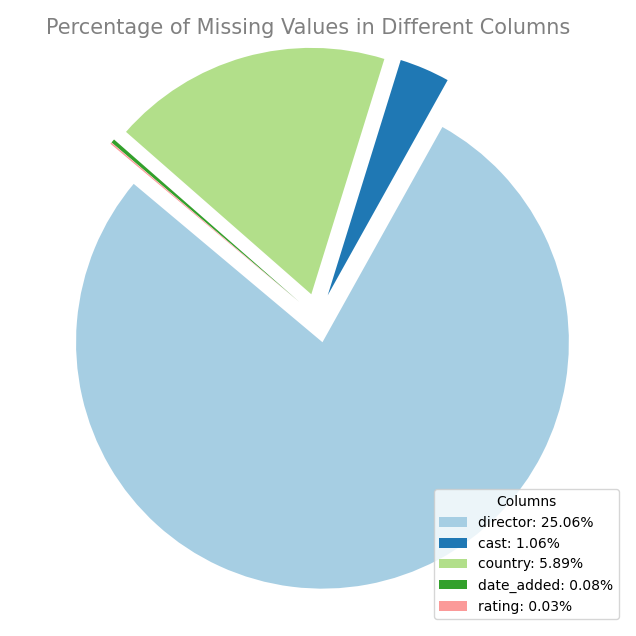

In [624]:
# Filter missing values greater than 0
filtered_df = missing_value_df[missing_value_df['Missing Percentage'] > 0]

# Extract labels and values correctly
labels = filtered_df['Column'].tolist()
values = filtered_df['Missing Percentage'].tolist()

# Plot pie chart
legend_labels = [f"{label}: {value:.2f}%" for label, value in zip(labels, values)]
plt.figure(figsize=(8,8))
wedges, texts = plt.pie(values, explode=[0.1] * len(labels), startangle=140, colors=plt.cm.Paired.colors)
plt.suptitle("Percentage of Missing Values in Different Columns", fontsize=15, color='gray', y=0.87)
plt.legend(wedges, legend_labels, title="Columns", loc="lower right")
plt.show()

**f. Statistical Summary:**

  Statistical summary can be obtained prior to and after data cleaning process

*   Statistical Summary Prior to data cleaning



Summary for numerical columns

In [625]:
categorical_df.describe(include=['int64']).T.astype(int)

,count,mean,std,min,25%,50%,75%,max
release_year,202065,2013,9,1925,2012,2016,2019,2021


Summary for categorical columns

In [626]:
cat_summary = categorical_df.describe(include='category').T
cat_summary['unique'] = categorical_df.nunique()
cat_summary

,count,unique,top,freq
type,202065,2,Movie,145917
country,190168,123,United States,59350
rating,201998,17,TV-MA,73915
listed_in,202065,42,Dramas,29806


In [627]:
# Missing values summary
missing_value_df

,Column,Missing Percentage
0,director,25.06
1,cast,1.06
2,country,5.89
3,date_added,0.08
4,rating,0.03
5,duration,0.00


director shows highest missing value percentage

duration shows the lowest missing value percentage

Correlation matrix

In [628]:
corr_matrix = categorical_df.select_dtypes(include=[int]).corr()
corr_matrix

,release_year
release_year,1.0


It shows low correlation due to single nurerical column

*   Statistical Summary after data cleaning


Fill the NaN values

In [629]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   show_id       202065 non-null  object  
 1   type          202065 non-null  category
 2   title         202065 non-null  object  
 3   director      151422 non-null  object  
 4   cast          199916 non-null  object  
 5   country       190168 non-null  category
 6   date_added    201907 non-null  object  
 7   release_year  202065 non-null  int64   
 8   rating        201998 non-null  category
 9   duration      202062 non-null  object  
 10  listed_in     202065 non-null  category
 11  description   202065 non-null  object  
dtypes: category(4), int64(1), object(7)
memory usage: 13.1+ MB


In [630]:
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype.name == 'category':
            if df[col].isna().any():  # Check if there are missing values
                df[col] = df[col].cat.add_categories([f"unknown_{col}"])
                df[col] = df[col].fillna(f"unknown_{col}")
        elif df[col].dtype.name == 'object':
            if df[col].isna().any():  # Check if there are missing values
                df[col] = df[col].fillna(f"unknown_{col}")
        else:
            df[col] = df[col].fillna(0)  # Fill numerical columns with 0
    return df

df_filled = fill_missing_values(categorical_df)
df_filled

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


Summary for numerical columns

In [631]:
df_filled.describe(include=['int64']).T.astype(int)

,count,mean,std,min,25%,50%,75%,max
release_year,202065,2013,9,1925,2012,2016,2019,2021


Since there is no addition/deletion of rows after replacing NaN values the observation remains the same.

Summary for categorical columns

In [632]:
cat_summary = df_filled.describe(include='category').T
cat_summary['unique'] = df_filled.nunique()
cat_summary

,count,unique,top,freq
type,202065,2,Movie,145917
country,202065,124,United States,59350
rating,202065,18,TV-MA,73915
listed_in,202065,42,Dramas,29806


Here the NaN values were replaced by unknown_column name for country and rating. Therefore the count is equal to total row count i.e. 202065

Missing values

In [633]:
missing_value_df = pd.DataFrame(columns=['Column', 'Missing Percentage'])

for column in df_filled.columns:
    new_row = {'Column': column, 'Missing Percentage': round(df_filled[column].isna().sum()/len(df_filled)*100, 2)}
    missing_value_df = pd.concat([missing_value_df, pd.DataFrame([new_row])], ignore_index=True)
missing_value_df

<ipython-input-633-698a3801847d>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  missing_value_df = pd.concat([missing_value_df, pd.DataFrame([new_row])], ignore_index=True)


,Column,Missing Percentage
0,show_id,0.0
1,type,0.0
2,title,0.0
3,director,0.0
4,cast,0.0
5,country,0.0
6,date_added,0.0
7,release_year,0.0
8,rating,0.0
9,duration,0.0


After filling the NaN values the dataframe shows 0 % missing data

Correlation matrix

In [634]:
corr_matrix = df_filled.select_dtypes(include=[int]).corr()
corr_matrix

,release_year
release_year,1.0


Since there is no change in the release year the count remains the same.

# 3. Non-Graphical Analysis: Value counts and unique attributes

In [635]:
df_filled['show_id'].value_counts().reset_index().head(10).T

,0,1,2,3,4,5,6,7,8,9
show_id,s7165,s6985,s7516,s2554,s5306,s6502,s3125,s3543,s7224,s6911
count,700,504,468,416,378,360,330,300,300,288


In [636]:
df_filled['type'].value_counts().reset_index().head(10).T

,0,1
type,Movie,TV Show
count,145917,56148


In [637]:
df_filled['title'].value_counts().reset_index().head(10).T

,0,1,2,3,4,5,6,7,8,9
title,Kahlil Gibran's The Prophet,Holidays,Movie 43,The Eddy,Narcos,Cloud Atlas,"Sincerely Yours, Dhaka",Olmo & the Seagull,Kon-Tiki,HALO Legends
count,700,504,468,416,378,360,330,300,300,288


In [638]:
df_filled['director'].value_counts().reset_index().head(10).T

,0,1,2,3,4,5,6,7,8,9
director,unknown_director,Martin Scorsese,Youssef Chahine,Cathy Garcia-Molina,Steven Spielberg,Lars von Trier,Raja Gosnell,Tom Hooper,McG,David Dhawan
count,50643,419,409,356,355,336,308,306,293,270


In [639]:
df_filled['cast'].value_counts().reset_index().head(10).T

,0,1,2,3,4,5,6,7,8,9
cast,unknown_cast,Liam Neeson,Alfred Molina,John Krasinski,Salma Hayek,Frank Langella,Anupam Kher,John Rhys-Davies,Shah Rukh Khan,Naseeruddin Shah
count,2149,161,160,139,130,128,127,125,108,106


In [640]:
df_filled['country'].value_counts().reset_index().head(10).T

,0,1,2,3,4,5,6,7,8,9
country,United States,India,United Kingdom,unknown_country,Japan,France,Canada,Spain,South Korea,Germany
count,59350,22814,12965,11897,8679,8254,7915,5315,5043,4383


In [641]:
df_filled['date_added'].value_counts().reset_index().head(10).T

,0,1,2,3,4,5,6,7,8,9
date_added,"January 1, 2020","November 1, 2019","July 1, 2021","October 1, 2017","September 1, 2021","March 1, 2018","December 31, 2019","October 1, 2019","October 1, 2018","June 2, 2021"
count,3730,2229,2219,1899,1756,1752,1695,1547,1419,1260


In [642]:
df_filled['release_year'].value_counts().reset_index().head(10).T

,0,1,2,3,4,5,6,7,8,9
release_year,2018,2019,2017,2020,2016,2015,2021,2014,2013,2012
count,24441,21931,20516,19697,18465,14128,11894,9098,7745,6354


In [643]:
df_filled['rating'].value_counts().reset_index().head(10).T

,0,1,2,3,4,5,6,7,8,9
rating,TV-MA,TV-14,R,PG-13,TV-PG,PG,TV-Y7,TV-Y,TV-G,NR
count,73915,43957,25860,16246,14926,10919,6304,3665,2779,1573


In [644]:
df_filled['duration'].value_counts().reset_index().head(10).T

,0,1,2,3,4,5,6,7,8,9
duration,1 Season,2 Seasons,3 Seasons,94 min,106 min,97 min,95 min,96 min,93 min,90 min
count,35035,9559,5084,4343,4040,3624,3560,3511,3480,3305


In [645]:
df_filled['listed_in'].value_counts().reset_index().head(10).T

,0,1,2,3,4,5,6,7,8,9
listed_in,Dramas,International Movies,Comedies,International TV Shows,Action & Adventure,Independent Movies,Children & Family Movies,TV Dramas,Thrillers,Romantic Movies
count,29806,28243,20829,12845,12216,9834,9771,8942,7107,6412


In [646]:
df_filled['description'].value_counts().reset_index().head(10).T

,0,1,2,3,4,5,6,7,8,9
description,A troubled young girl and her mother find sola...,Eight gleefully grim short tales set on Hallow...,An eye-popping cast stars in this sketch-comed...,The owner of a Paris jazz club gets tangled up...,The true story of Colombia's infamously violen...,"In this star-studded drama, six seemingly disp...",Eleven emerging Bangladeshi filmmakers present...,A pregnancy forces an actress out of her lates...,"With five loyal friends in tow, explorer Thor ...",This anthology features seven independent anim...
count,700,504,468,416,378,360,330,300,300,288


# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

**4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

Count Plot:

In [647]:
import matplotlib.pyplot as plt
import seaborn as sns

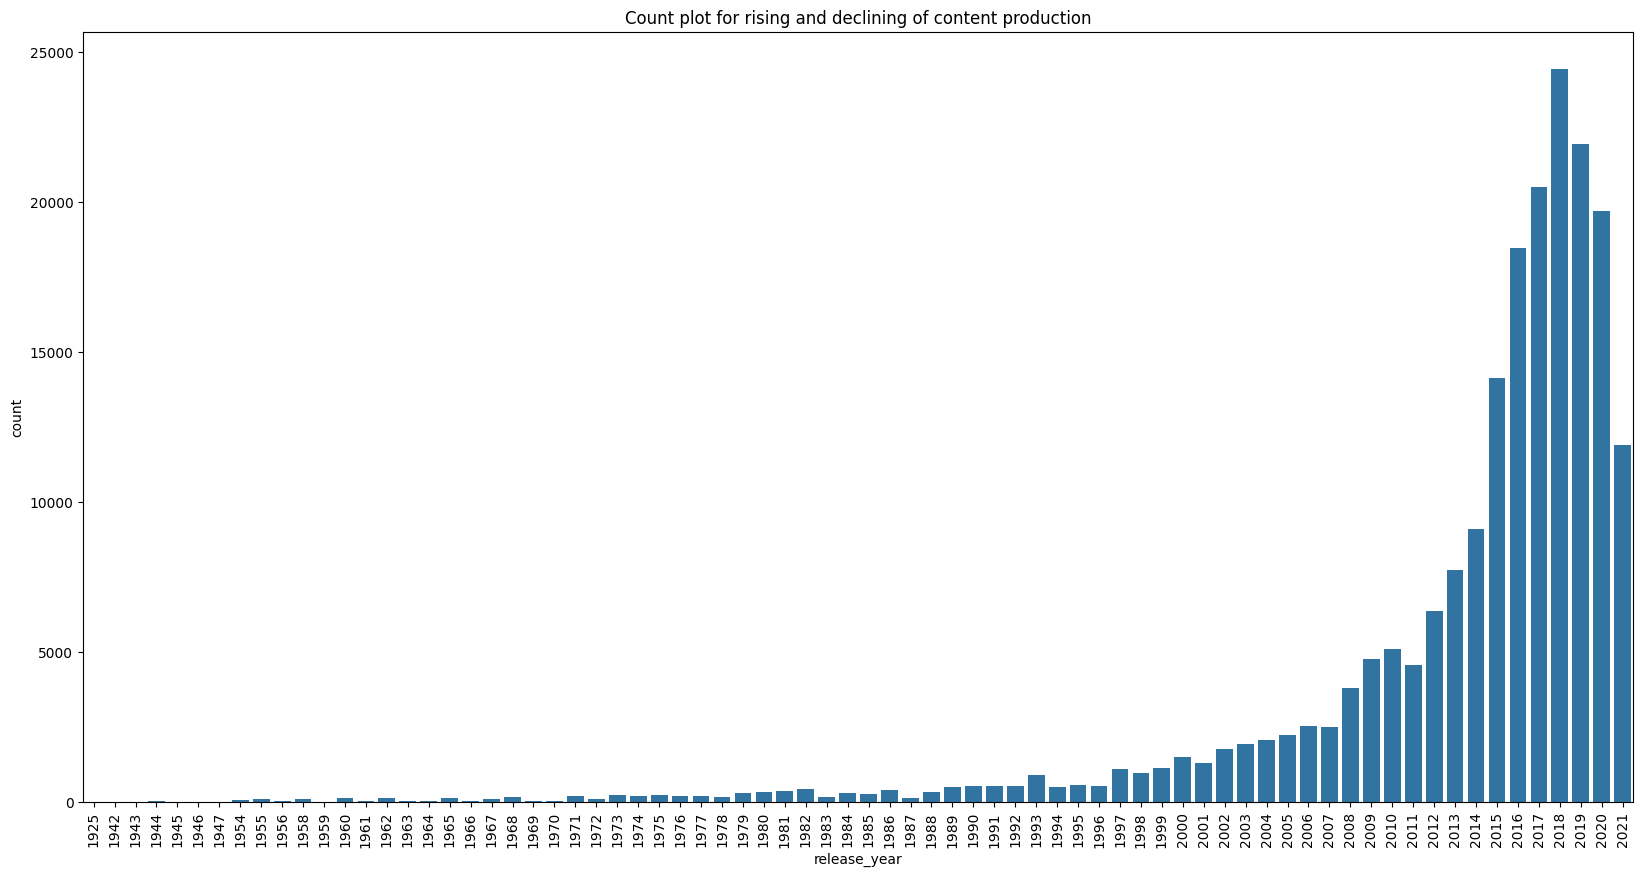

In [648]:
plt.figure(figsize=(20,10))
sns.countplot(x = df_filled['release_year'], data=df_filled)
plt.xticks(rotation = 90)
plt.title('Count plot for rising and declining of content production')
plt.show()

Histogram

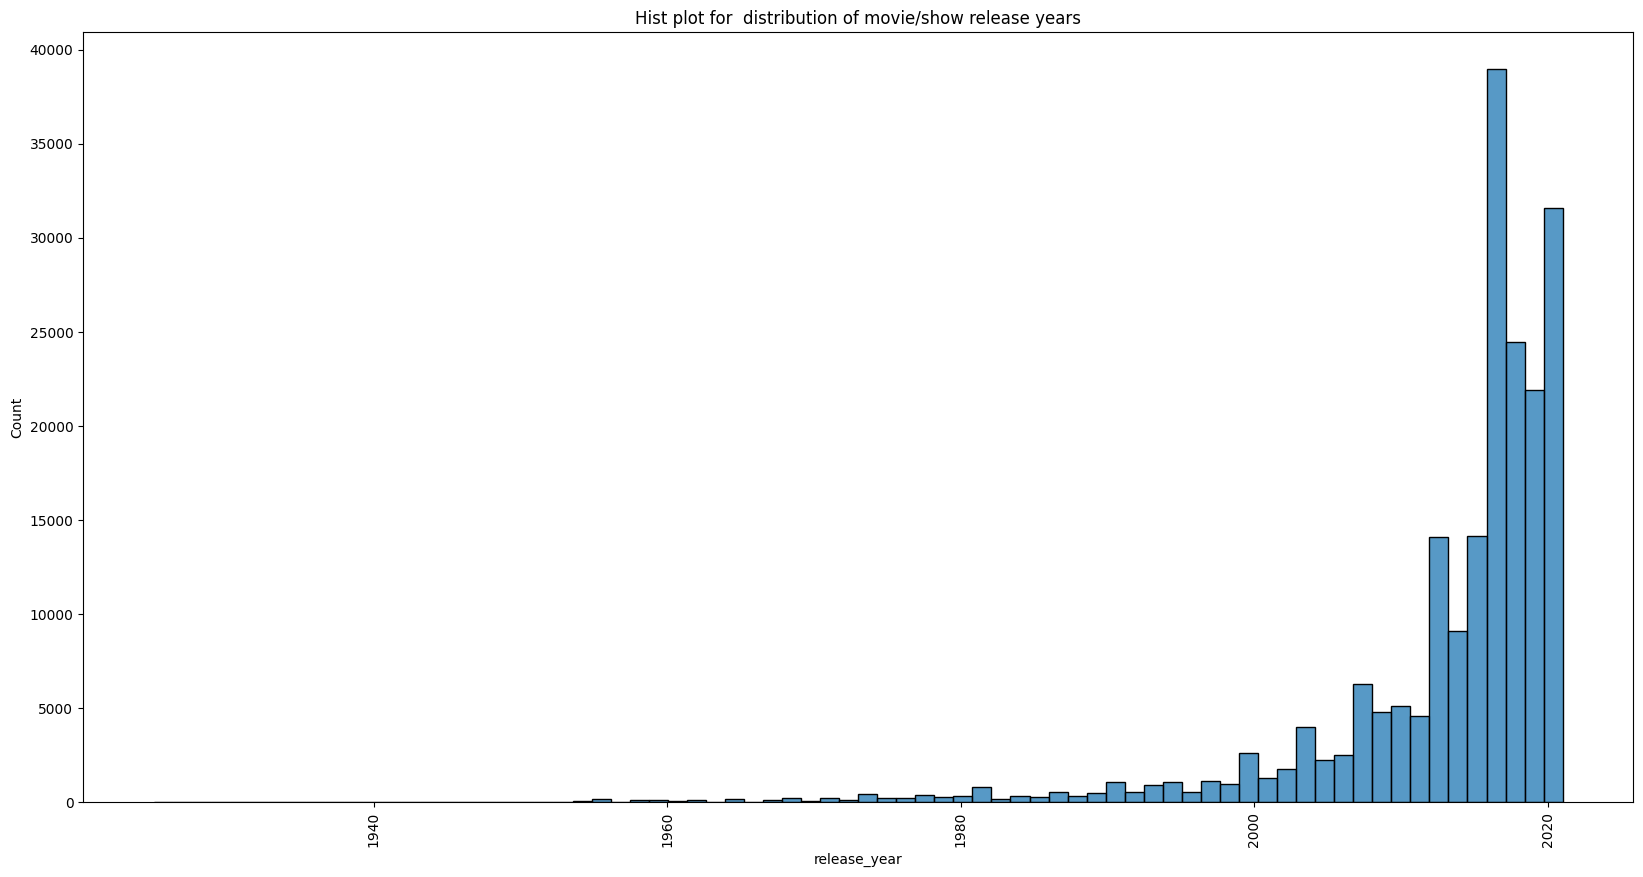

In [649]:
plt.figure(figsize=(20,10))
sns.histplot(x = df_filled['release_year'], bins=(len(df_filled['release_year'].unique())))
plt.xticks(rotation = 90)
plt.title('Hist plot for  distribution of movie/show release years')
plt.show()

Please note that distplot is deprecated therefore, we are using histogram with KDE = true

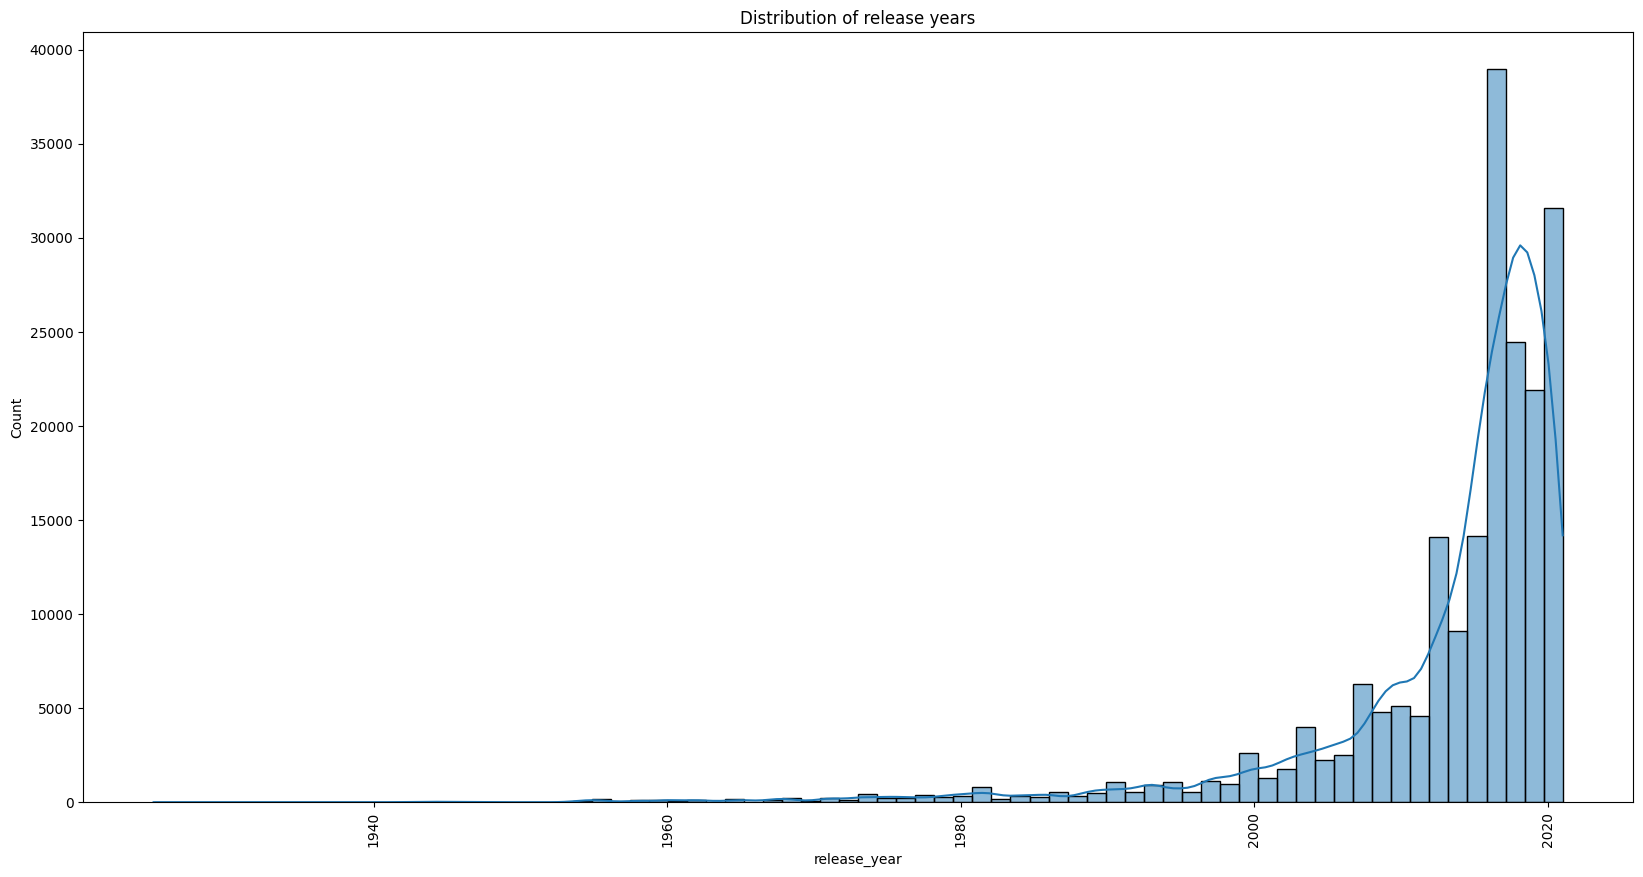

In [650]:
plt.figure(figsize=(20,10))
sns.histplot(x = df_filled['release_year'], bins=(len(df_filled['release_year'].unique())), kde = True)
plt.xticks(rotation = 90)
plt.title('Distribution of release years')
plt.show()

**4.2 For categorical variable(s): Boxplot**

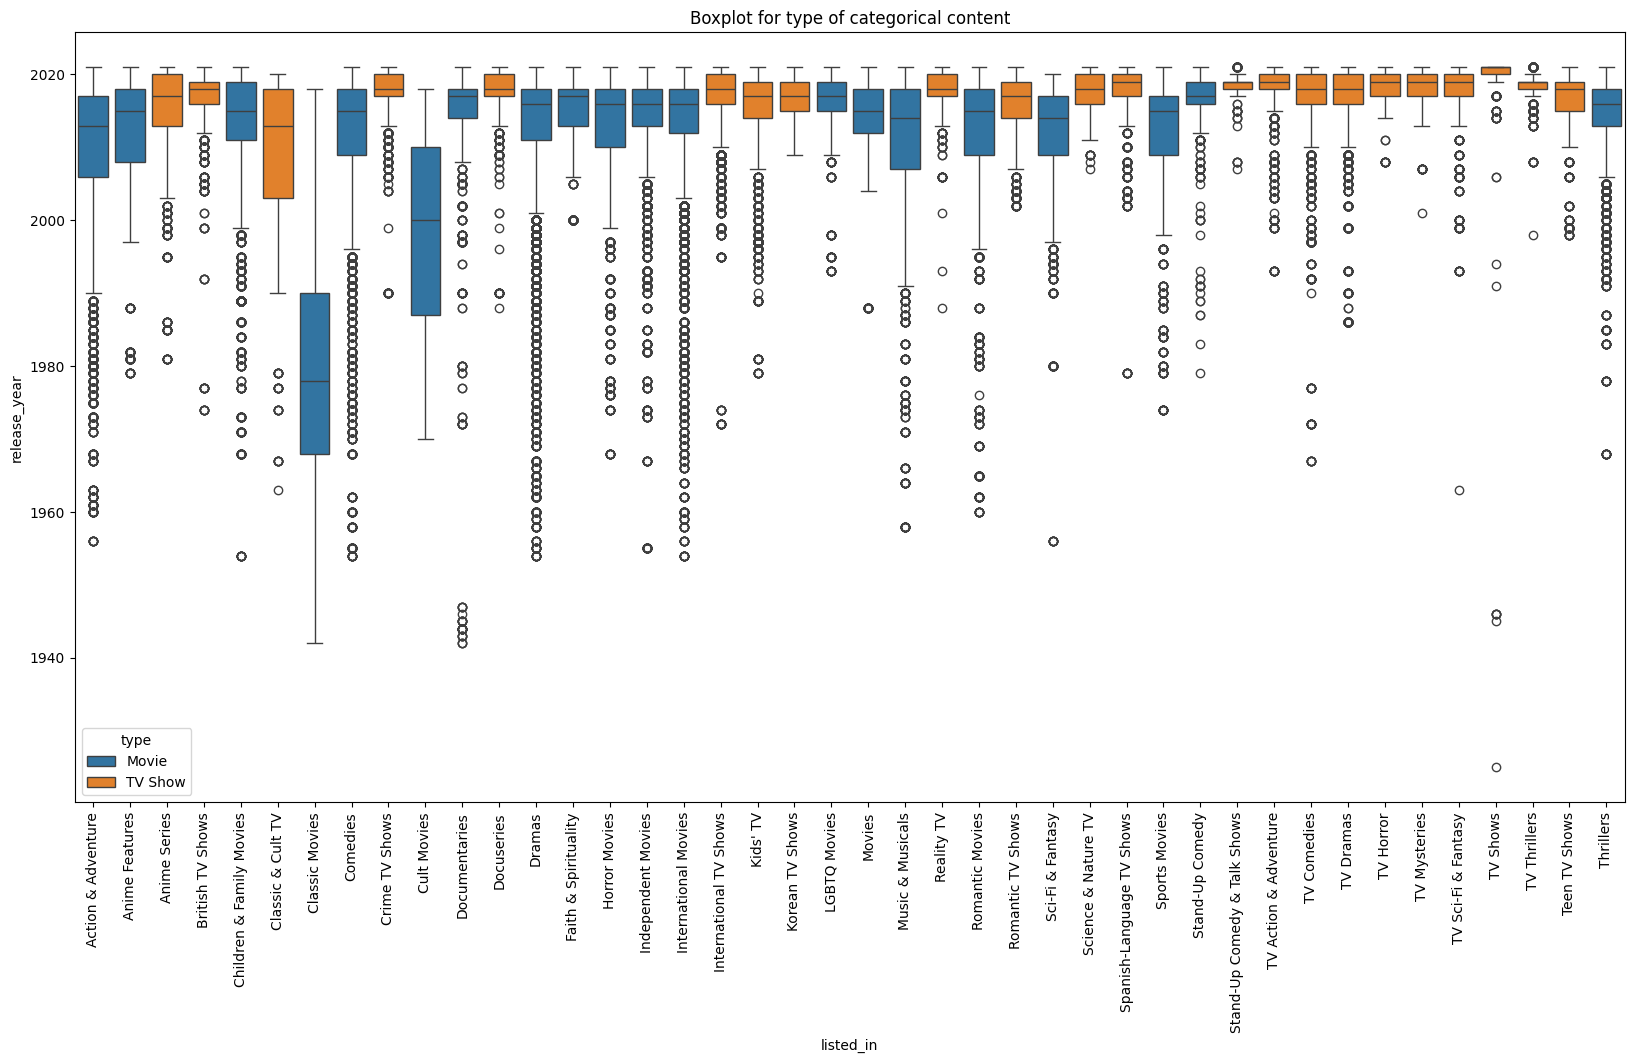

In [651]:
plt.figure(figsize=(20,10))
sns.boxplot(x='listed_in',y='release_year',hue='type',data=df_filled)
plt.xticks(rotation = 90)
plt.title('Boxplot for type of categorical content')
plt.show()

Subplot for all categorical columns

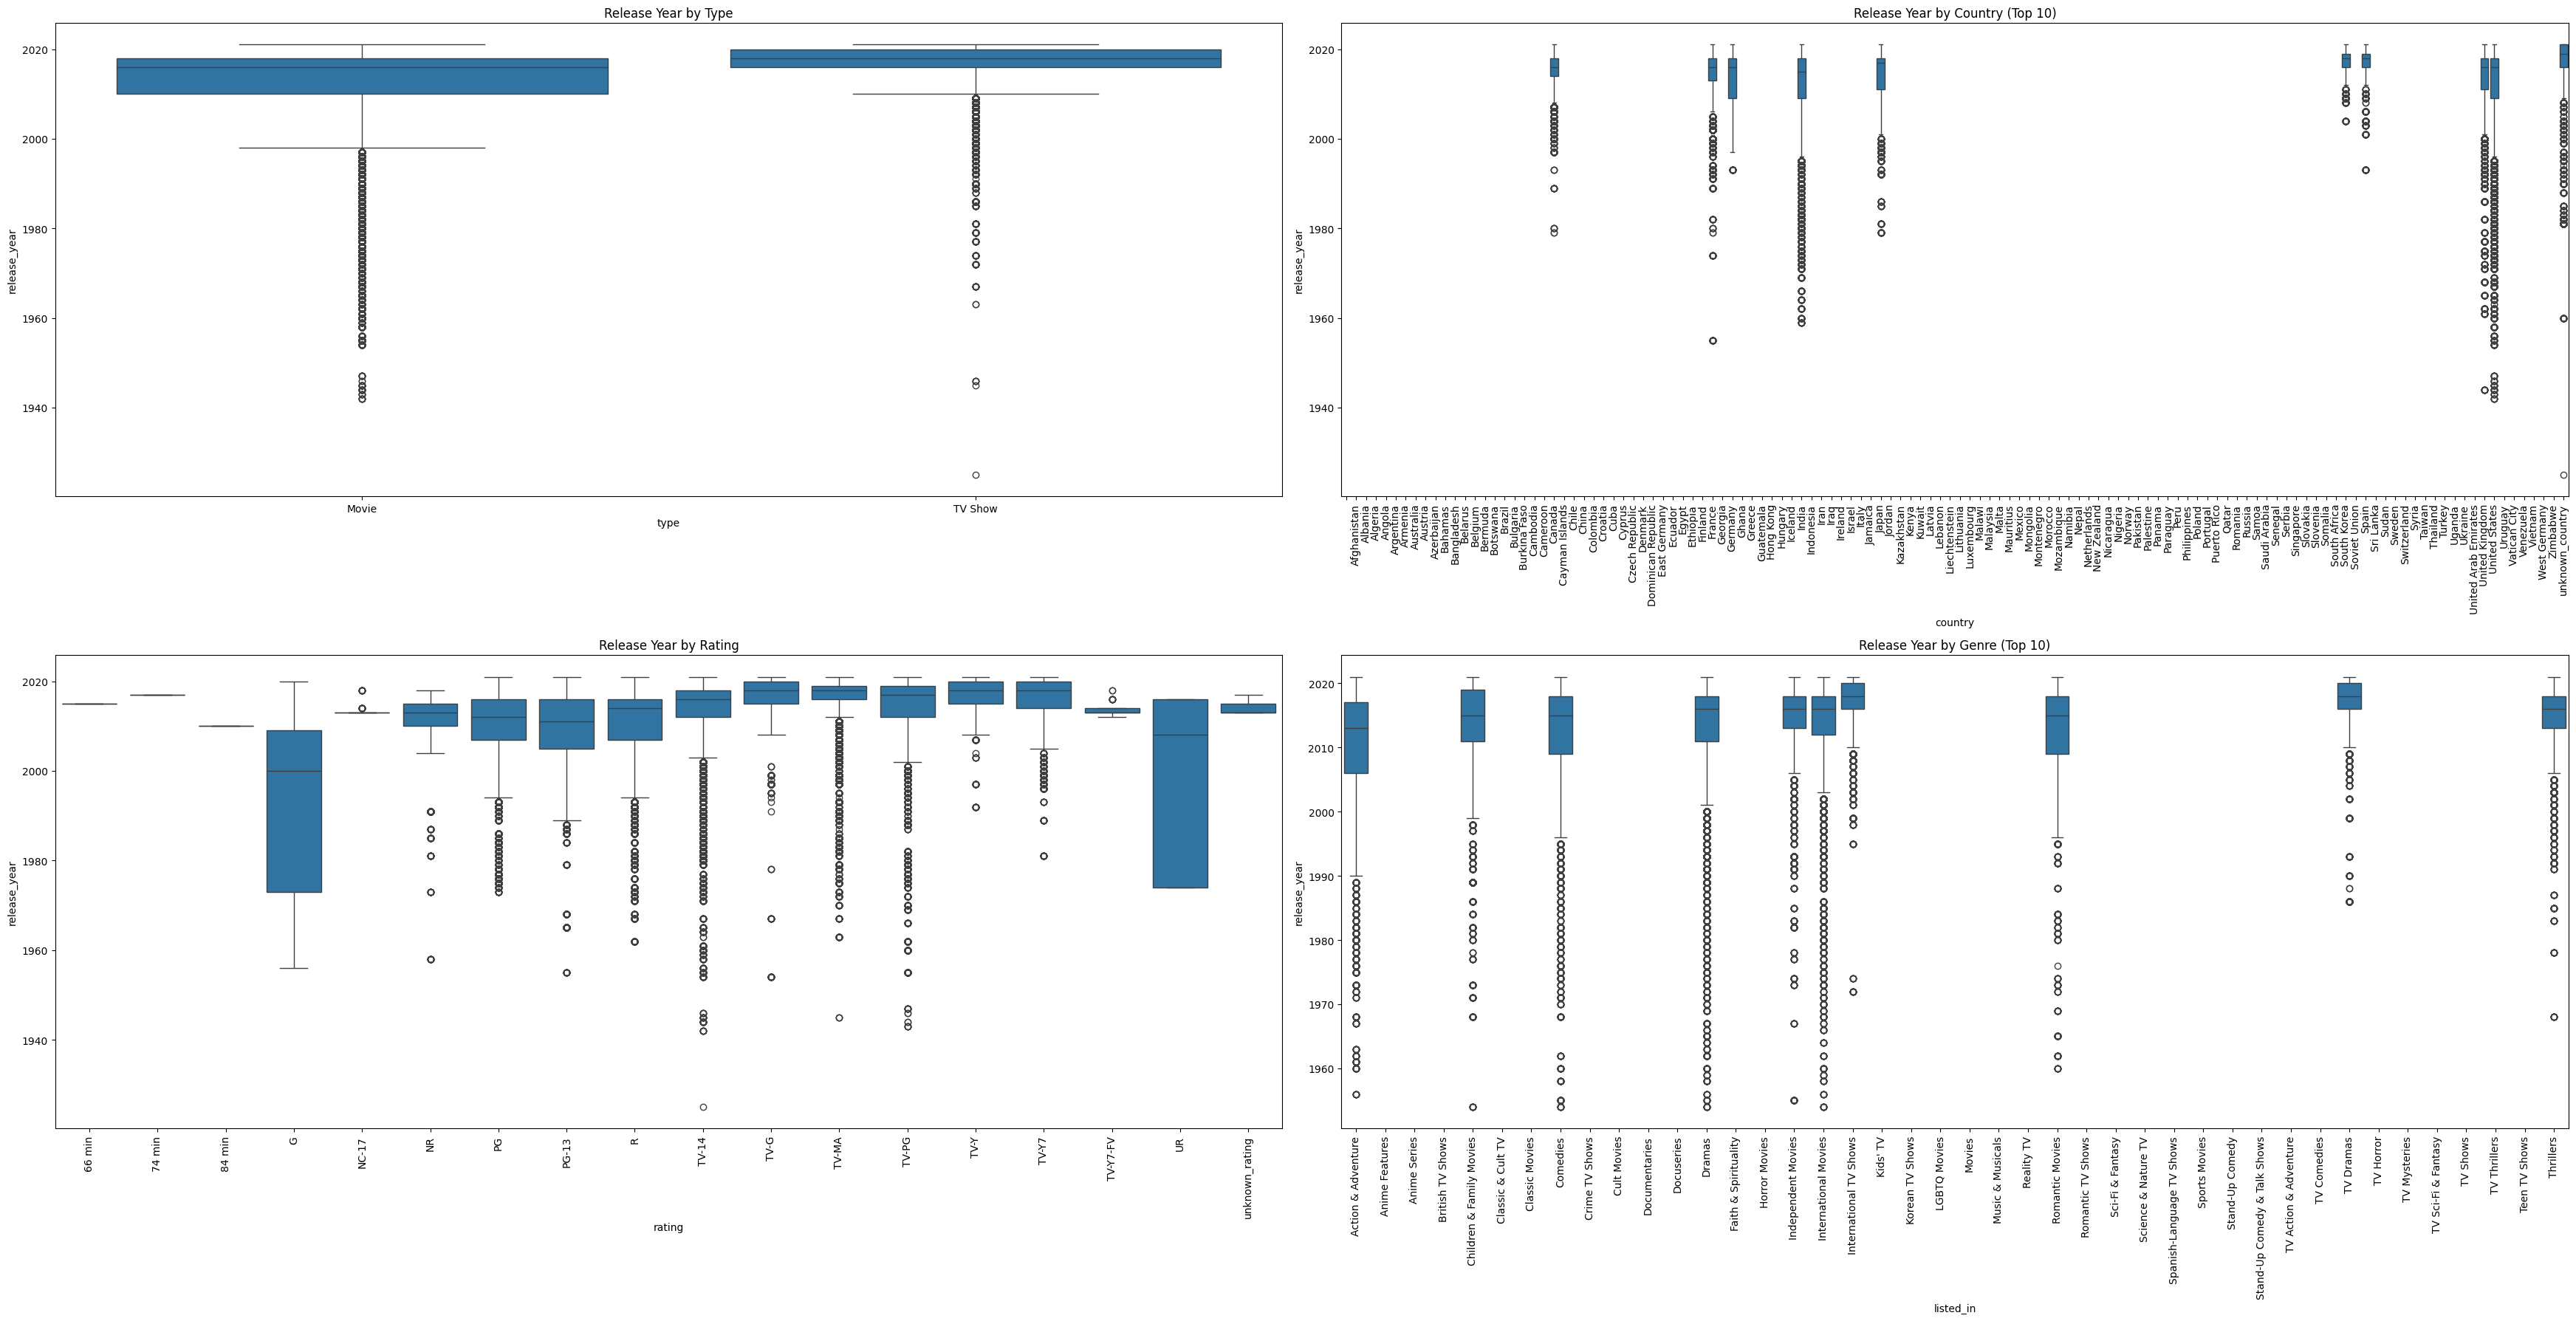

In [652]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_filled' is your dataset

# Set figure size
plt.figure(figsize=(35,18))

# Subplot 1: Boxplot for 'type'
plt.subplot(2, 2, 1)
sns.boxplot(x='type', y='release_year', data=df_filled)
plt.title("Release Year by Type")

# Subplot 2: Boxplot for 'country' (showing only top 10 countries)
top_countries = df_filled['country'].value_counts().index[:10]
plt.subplot(2, 2, 2)
sns.boxplot(x='country', y='release_year', data=df_filled[df_filled['country'].isin(top_countries)])
plt.xticks(rotation=90)
plt.title("Release Year by Country (Top 10)")

# Subplot 3: Boxplot for 'rating'
plt.subplot(2, 2, 3)
sns.boxplot(x='rating', y='release_year', data=df_filled)
plt.xticks(rotation=90)
plt.title("Release Year by Rating")

# Subplot 4: Boxplot for 'listed_in' (showing only top 10 categories)
top_genres = df_filled['listed_in'].value_counts().index[:10]
plt.subplot(2, 2, 4)
sns.boxplot(x='listed_in', y='release_year', data=df_filled[df_filled['listed_in'].isin(top_genres)])
plt.xticks(rotation=90)
plt.title("Release Year by Genre (Top 10)")

plt.tight_layout()
plt.show()

**4.3 For correlation: Heatmaps, Pairplots**

In [653]:
corr_matrix = df_filled.select_dtypes(include=[int])
corr_matrix

,release_year
0,2020
1,2021
2,2021
3,2021
4,2021
...,...
202060,2015
202061,2015
202062,2015
202063,2015


In [654]:
corr_matrix.corr()

,release_year
release_year,1.0


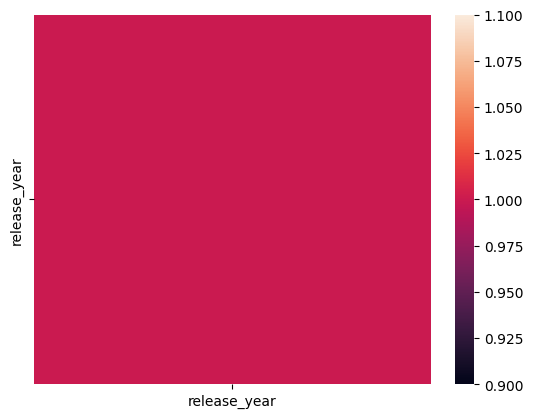

In [655]:
sns.heatmap(corr_matrix.corr())
plt.show()

Pair Plot

<Figure size 2000x2000 with 0 Axes>

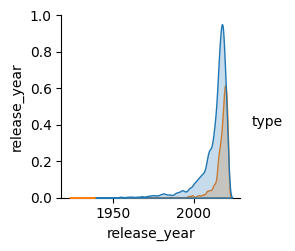

In [656]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df_filled, hue='type')
plt.show()

# 5. Missing Value & Outlier check (Treatment optional)

In [657]:
missing_value_df

,Column,Missing Percentage
0,show_id,0.0
1,type,0.0
2,title,0.0
3,director,0.0
4,cast,0.0
5,country,0.0
6,date_added,0.0
7,release_year,0.0
8,rating,0.0
9,duration,0.0


<Axes: ylabel='Missing Percentage'>

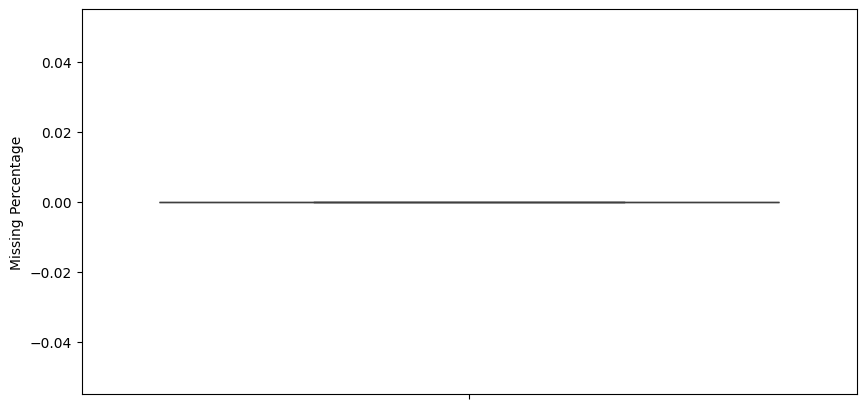

In [658]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Missing Percentage',data=missing_value_df)

The box plot shows a flat line at zero, which suggests that all values in the "Missing Percentage" column are either 0 or very close to 0

# 6. Insights based on Non-Graphical and Visual Analysis

**6.1 Comments on the range of attributes**

In [659]:
df_filled.describe(include=['int64']).T.astype(int)

,count,mean,std,min,25%,50%,75%,max
release_year,202065,2013,9,1925,2012,2016,2019,2021


* There are 202,065 non-null values in the release_year column. No missing

* The average release year is approximately 2013.

* The release years vary by around 9 years from the mean.

* The earliest release year in the dataset is 1925.

* 25% of the movies were released in or before 2012.

* The median release year is 2016 (half the movies were released before this, half after).

* 75% of movies were released in or before 2019.

* The most recent release year in the dataset is 2021.

In [660]:
cat_summary = df_filled.describe(include='category').T
cat_summary['unique'] = df_filled.nunique()
cat_summary

,count,unique,top,freq
type,202065,2,Movie,145917
country,202065,124,United States,59350
rating,202065,18,TV-MA,73915
listed_in,202065,42,Dramas,29806


* Movies dominate the content with 72.2% (145,917 out of 202,065) compared to TV shows.

* The United States is the top content producer, contributing 29.37% (59,350 out of 202065) of the data.

* TV-MA is the most common rating, accounting for 36.57% (73,915 out of 202065) of the content.

* Dramas are the most popular genre, making up 14.7% (29,806 out of 202,065) of the dataset.

**6.2 Comments on the distribution of the variables and relationship between them**

* Distribution - For Numerical Variables:

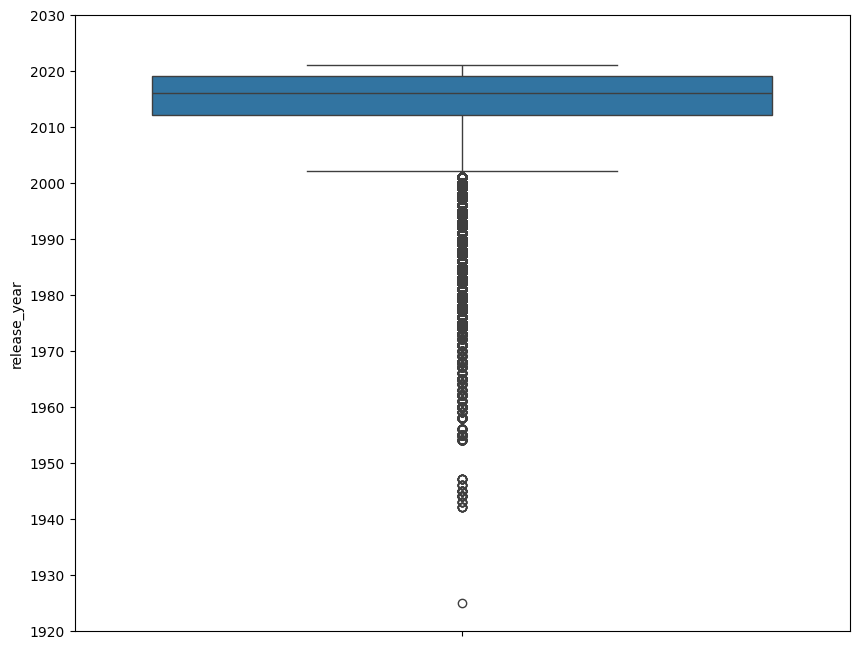

In [661]:
plt.figure(figsize=(10,8))
sns.boxplot(y='release_year',data=df_filled)
plt.yticks(np.arange(1920, 2040, 10))
plt.show()

**Insights:**

The dataset contains a majority of recent releases, mostly from 2010 onward.

Older releases are rare but present as outliers.

More movies and TV shows have been made in the last 20 years, likely because of the growth of digital platforms and streaming services

* Distribution - For Categorical Variables:

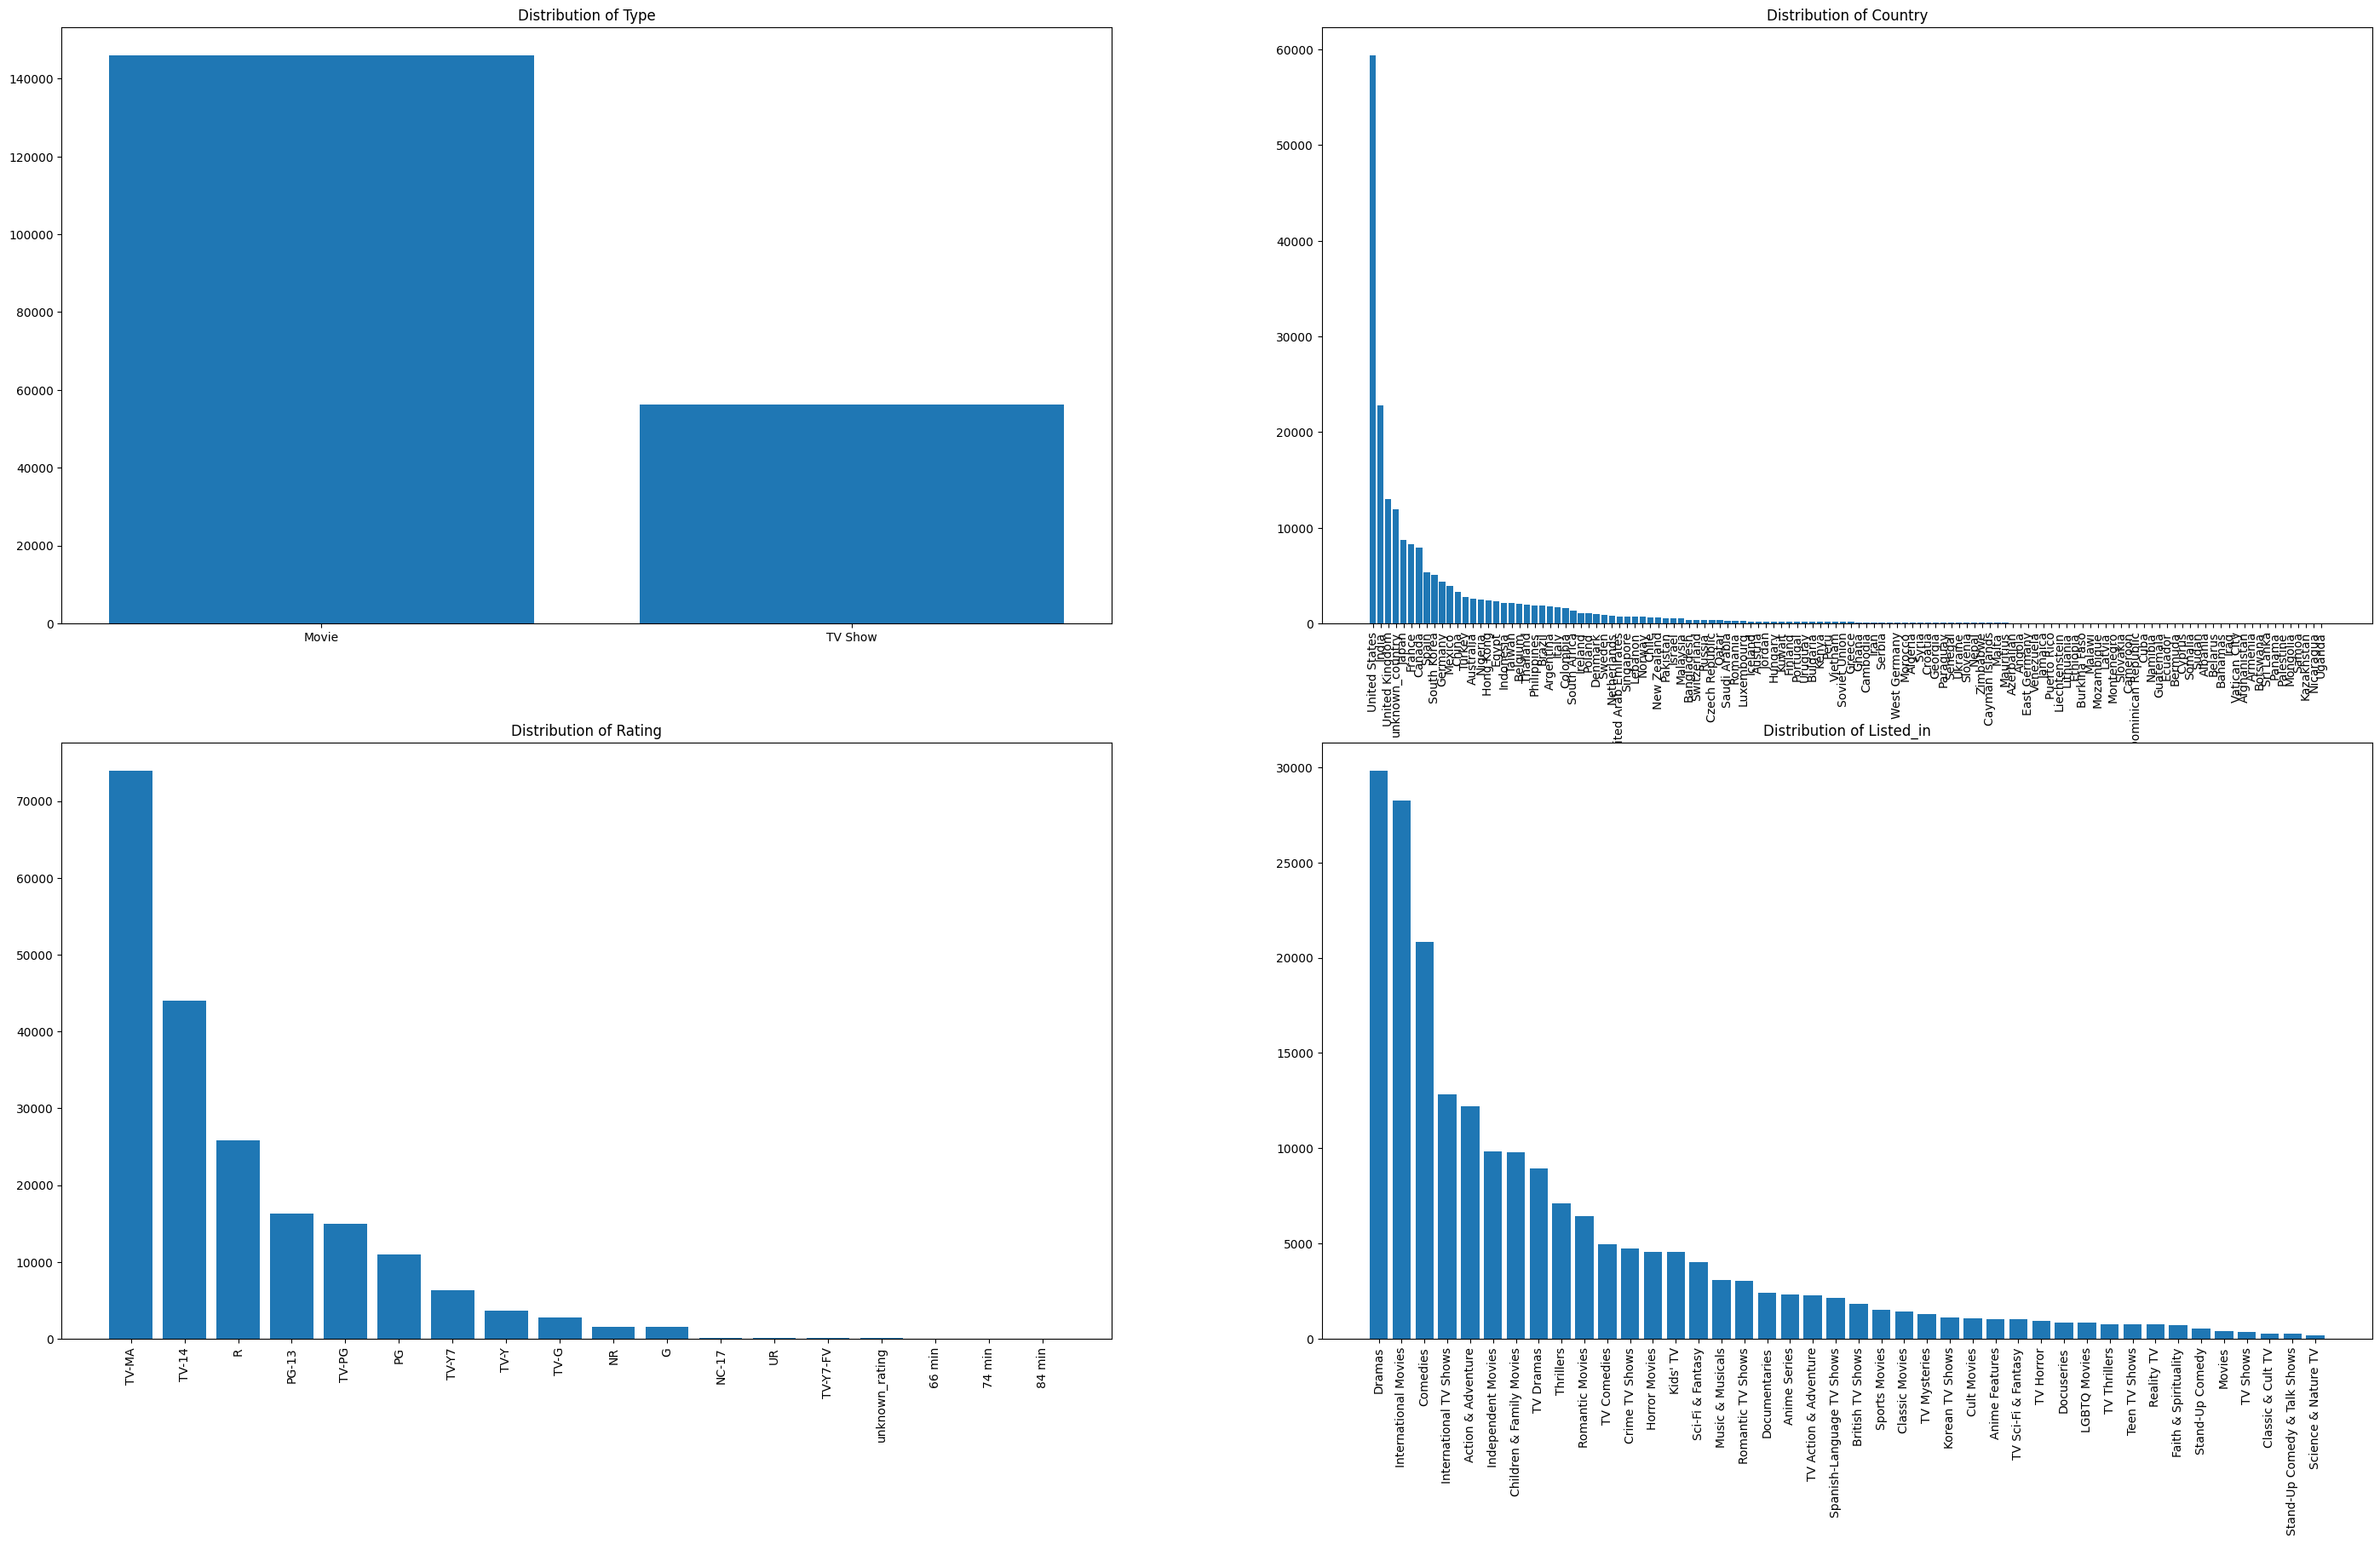

In [662]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_filled' is your dataset

# Set figure size
plt.figure(figsize=(35,20))

# Subplot 1: Barplot for 'type'
plt.subplot(2, 2, 1)
types = df_filled['type'].value_counts().index
counts = df_filled['type'].value_counts().values
plt.bar(x=types, height=counts, data=df_filled)
plt.title("Distribution of Type")

# Subplot 2: Boxplot for 'country' (showing only top 10 countries)
plt.subplot(2, 2, 2)
countries = df_filled['country'].value_counts().index
counts = df_filled['country'].value_counts().values
plt.bar(x=countries, height=counts, data=df_filled)
plt.xticks(rotation=90)
plt.title("Distribution of Country")

# Subplot 3: Boxplot for 'rating'
plt.subplot(2, 2, 3)
plt.bar(x=df_filled['rating'].value_counts().index, height=df_filled['rating'].value_counts().values, data=df_filled)
plt.xticks(rotation=90)
plt.title("Distribution of Rating")

# Subplot 1: Barplot for 'listed_in'
plt.subplot(2, 2, 4)
genre = df_filled['listed_in'].value_counts().index
counts = df_filled['listed_in'].value_counts().values
plt.bar(x=genre, height=counts, data=df_filled)
plt.title("Distribution of Listed_in")
plt.xticks(rotation=90)

#plt.tight_layout()
plt.show()

**Distribution of Type and their relationships:**

Movies vs. TV Shows
Movies dominate the dataset, with a significantly higher count compared to TV shows.

The number of TV shows is less than half of movies.

**Distribution of Country and their relationships:**

The United States has the highest number of content entries, followed by India and other countries.

Distribution suggests that while a few countries produce a lot of content, many countries contribute only a small amount.

Some countries have very few entries, indicating limited representation in the dataset.

**Distribution of Ratings and their relationships:**
TV-MA (Mature Audience) is the most common rating, followed by TV-14 and PG.

R and PG-13 rated content is also common, suggesting a mix of family-friendly and adult-oriented content.

Less common ratings (like G, NC-17) indicate that strictly children's content and highly restricted content are rare.

The presence of unknown or missing ratings suggests that some data entries may lack rating information.

**6.3 Comments for each univariate and bivariate plot**

**1. Univariate : Countplot**

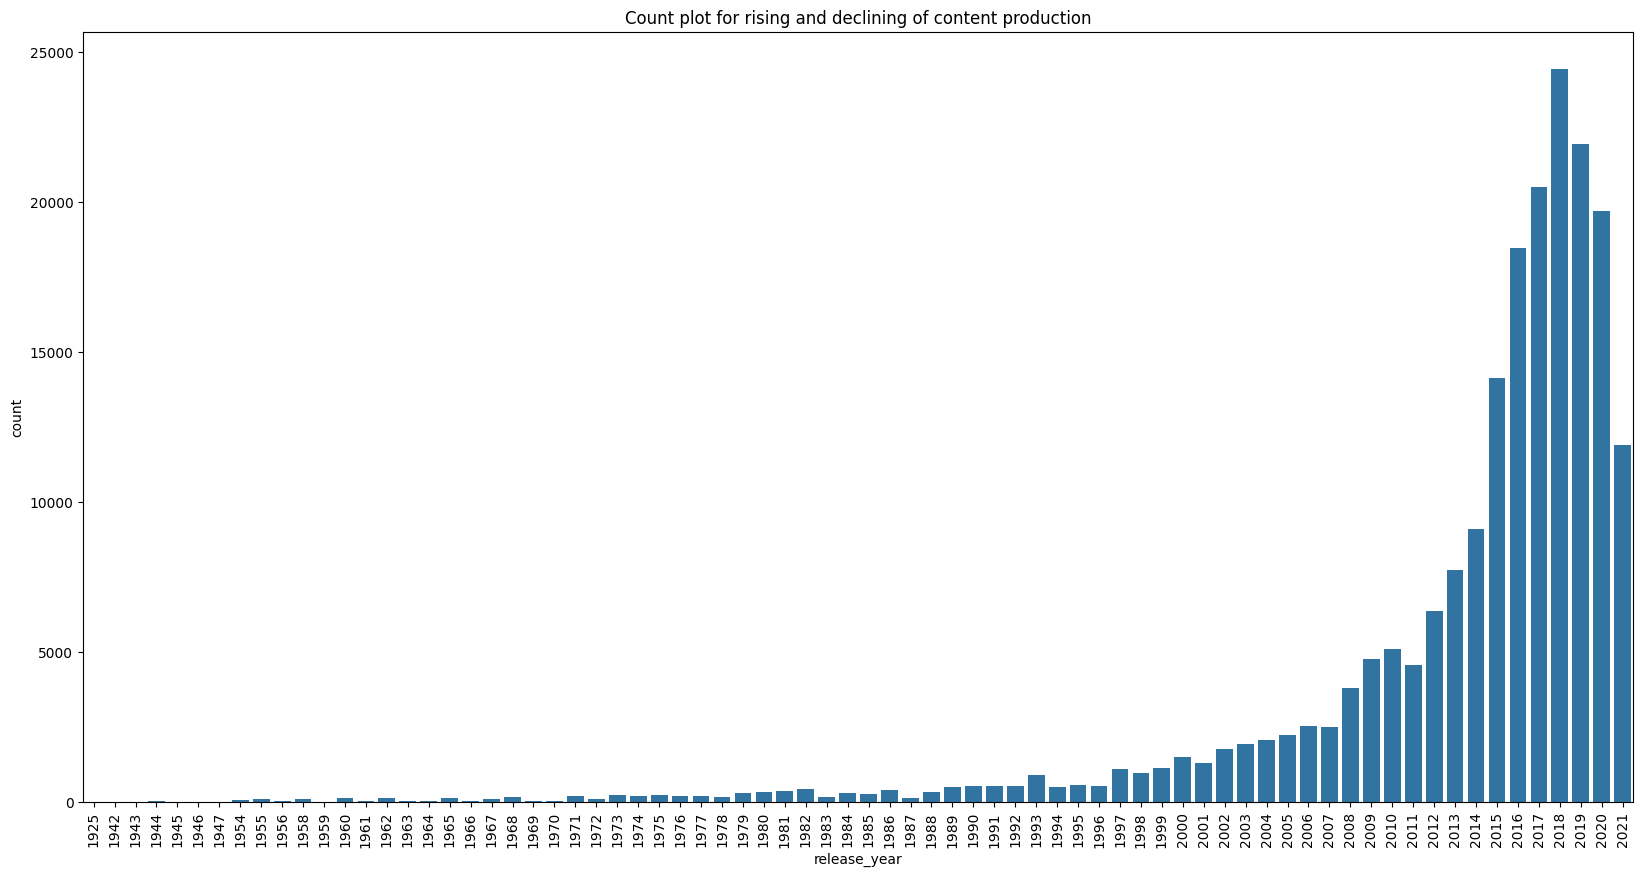

In [663]:
plt.figure(figsize=(20,10))
sns.countplot(x = df_filled['release_year'], data=df_filled)
plt.xticks(rotation = 90)
plt.title('Count plot for rising and declining of content production')
plt.show()

**Increasing Trend in Content Production**

From the early 1920s to the 1990s, the number of productions was relatively low, with only a gradual increase.

A significant upward trend started in the early 2000s, showing a steady rise in content production.

**Peak Production Years (2015–2020)**

The highest number of productions occurred between 2015 and 2020.

The rapid growth during this period aligns with the rise of streaming platforms (Netflix, Amazon Prime, Disney+, etc.), leading to higher content demand.

**Decline in 2021**

There's a noticeable dip in 2021, which could be attributed to the COVID-19 pandemic's impact on content production (delays, restrictions, and industry slowdowns).

**Digital & Streaming Influence**

The boom from 2010 onwards suggests a shift towards digital content, fueled by increased internet accessibility, mobile usage, and streaming services.

**2. Bivariate:**

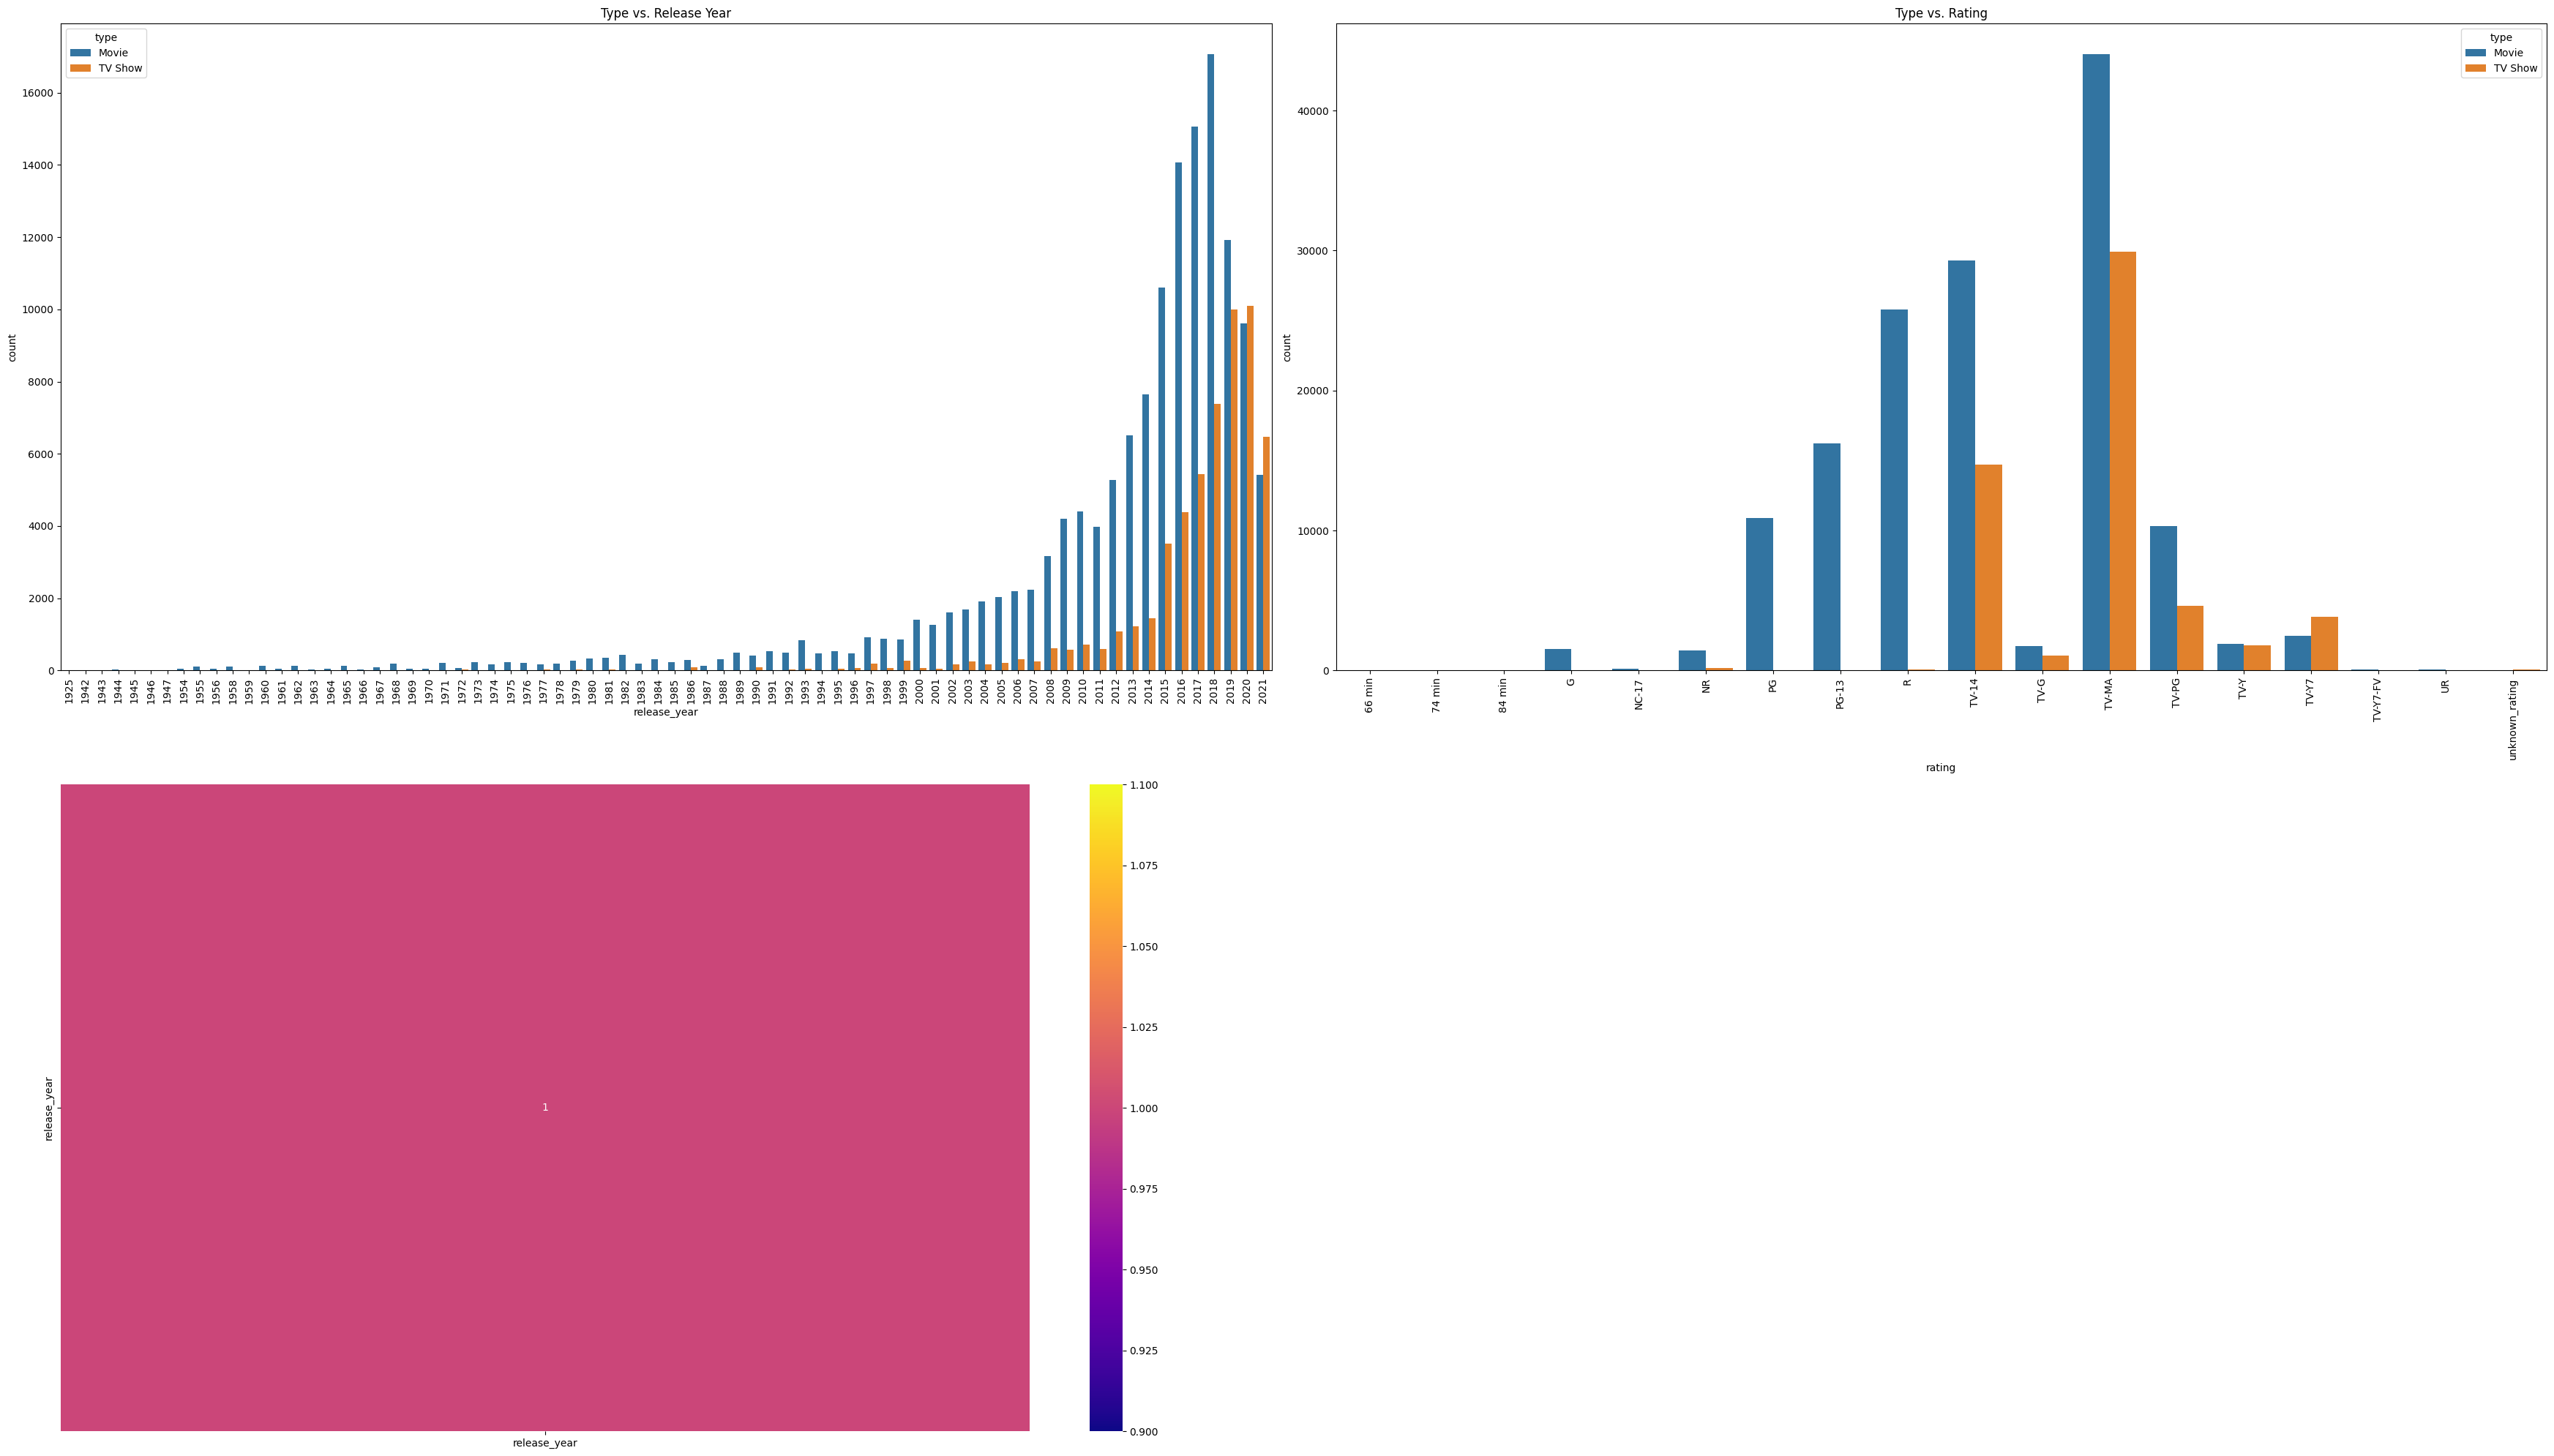

In [664]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_filled' is your dataset

# Set figure size
plt.figure(figsize=(35,20))

# Subplot 1: Barplot for 'type'
plt.subplot(2, 2, 1)
sns.countplot(x='release_year', hue='type', data=df_filled)
plt.xticks(rotation=90)
plt.title("Type vs. Release Year")

# Subplot 2: Boxplot for 'country' (showing only top 10 countries)
plt.subplot(2, 2, 2)
sns.countplot(x='rating', hue='type', data=df_filled)
plt.xticks(rotation=90)
plt.title("Type vs. Rating")

# Subplot 3: Boxplot for 'rating'
plt.subplot(2, 2, 3)
corr_matrix.corr()
sns.heatmap(corr_matrix.corr(), annot=True, cmap='plasma')


plt.tight_layout()
plt.show()

**Insights of Type V/s Release year :**

Movies remain the dominant format, but TV shows have been rising.

Streaming services have fueled the content boom.

The pandemic in 2020-2021 may have caused a dip in production.

The entertainment industry has rapidly evolved post-2000.

**Insights of Type v/s Rating:**

Mature content (TV-MA, R, TV-14) dominates both Movies & TV Shows.

Movies are more structured in terms of MPAA ratings (PG, PG-13, R), while TV Shows follow TV ratings (TV-MA, TV-14).

Family-friendly content (TV-G, TV-Y, G) is relatively limited.

**Heatmap**
No meaningful insights as we only have one numerical column

# 7. Business Insights - Should include patterns observed in the data along with what you can infer from it

**Following patterns were observed:**

Business Insights- Based on our numerical-categorical and categorical-categorical distribution analysis, we can derive the following key business insights:

**Content Strategy**: Movies dominate TV shows by 72.2% of the content, indicating a strong preference for movies over TV shows. It is advisable to prioritize investments in movie production (Please refer 6.1 and 6.2 for catgorical).

**Country-wise Focus**: The United States is the leading contributor to content creation, accounting for 29.7%, followed by India, the United Kingdom, and other countries. However, the content production in these regions is significantly lower than that of the United States, with India contributing less than half of the U.S. content volume.

**Target Audience**: TV-MA (Mature Audience) is the most most common rating, representing 36.57% of the content, followed by TV-14 and PG, indicating a strong focus on mature and young adult audiences(please refer 6.2 categorical 2nd graph).

**Genre Trends:**  Drama is the most popular genre, comprising 14.7% of the dataset, highlighting its significance in content engagement(Please refer 6.1 Categorical non-visual and 4.2 univariate).

**Year-wise Trends**: The trend in movie production shows a gradual rise starting in 2008, with a sharp increase in 2015, peaking in 2018 as the highest production year.

TV show production gained momentum from 2016, experiencing a rapid increase in 2019 and 2020, coinciding with the pandemic era when content production was halted. During this period, older television series such as Ramayana, Mahabharata, and Krishna were widely aired to keep audiences engaged. (Please refer 6.3 bivariate 1st graph)

# 8 Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

**Recommendation** - Netflix should prioritize movie production, ensuring a strong movie catalog while selectively expanding high-quality TV shows.

Strengthen US content offerings while expanding regional content in India and other growing markets.

Local language productions in countries can help attract new subscribers.
Netflix can focus on producing and promoting mature content, as it aligns with viewer demand. Along with this as we can see significant presence of PG and PG-13 content (family-friendly content) should not be ignored.

Netflix should continue investing in recent content with some throwback of old movies contents to enagaged different age groups.

Netflix should keep introducing unique releases, local content, and interactive stories to stay ahead of competitors.